## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
# Display the data table for preview
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = clean_df["Mouse ID"].count()
mouse_count_new

#clean_df["Mouse ID"]


249

## Summary Statistics

In [9]:
mice_df = pd.merge(clean_df,study_results,how='outer', on = "Mouse ID")
mice_df

del mice_df['Timepoint_x']
del mice_df['Metastatic Sites_x']
del mice_df['Tumor Volume (mm3)_x']            
mice_df

mice_df = mice_df.rename(columns={'Timepoint_y': 'Timepoint', 'Tumor Volume (mm3)_y': 'Tumor Volume',
                        'Metastatic Sites_y': 'Metastatic Site'})
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Site
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Groupby Mice DataFrame and Drug Regimen
mice_groupby_df = mice_df.groupby(["Drug Regimen"])
mice_groupby_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Site
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = round(mice_groupby_df['Tumor Volume'].mean(),2)
tumor_median = round(mice_groupby_df['Tumor Volume'].median(),2)
tumor_variance = round(mice_groupby_df['Tumor Volume'].var(),2)
tumor_standarddev = round(mice_groupby_df['Tumor Volume'].std(),2)
tumor_sem = round(mice_groupby_df['Tumor Volume'].sem(),2)


summary_tumor_volume_df = pd.DataFrame({'Average Tumor Volume': tumor_mean,
                                        'Median Tumor Volume': tumor_median,
                                        'Variance Tumor Volume': tumor_variance,
                                        'Std of Tumor Volume': tumor_standarddev,
                                        'SEM of Tumor Volume': tumor_sem})

summary_tumor_volume_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

,Average Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_tbl = mice_groupby_df.agg(['mean','median','var','std','sem'])['Tumor Volume']
summary_tbl

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

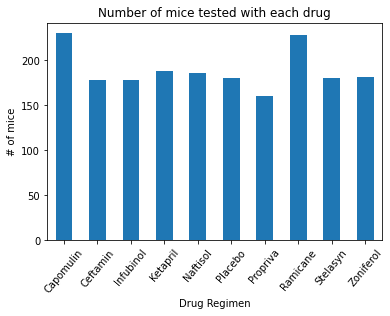

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = mice_groupby_df.count().reset_index()
drugs = total_timepoints[["Drug Regimen","Mouse ID"]]
drugs = drugs.set_index("Drug Regimen")
drugs.plot(kind="bar", legend = False, rot = 50,ylabel = '# of mice')

plt.title("Number of mice tested with each drug")
plt.show

plt.show()

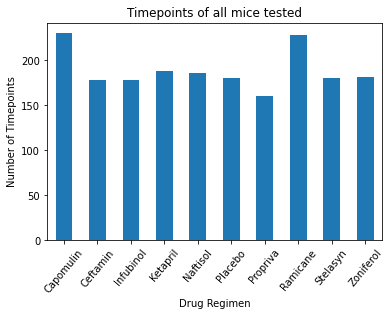

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_timepoints = mice_groupby_df.count()['Timepoint']
plt.ylabel('Number of Timepoints')
plt.title('Timepoints of all mice tested')
total_timepoints.plot.bar(legend=False,rot=50)
plt.show()

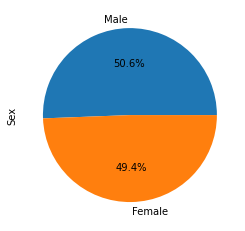

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Collect vaule count of sex

sex_count = mice_df["Sex"].value_counts()
sex_count

sex_count.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [16]:
# sex_count = mice_df.groupby(["Mouse ID", "Sex"]).count().reset_index()[["Mouse ID", "Sex"]]["Sex"].value_counts()

sex_count = mice_df.groupby(["Mouse ID", "Sex"]).count()
sex_count = sex_count.reset_index()
sex_count = sex_count[["Mouse ID", "Sex"]]

mouse_sex_df = sex_count["Sex"].value_counts()

mouse_sex_df = mouse_sex_df.to_frame()
mouse_sex_df

,Sex
Male,125
Female,124


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
# #mice_sex = pd.DataFrame
# sex_count = mice_df["Sex"].value_counts()
# mouse_sex_df = pd.DataFrame(sex_count)
# mouse_sex_df

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


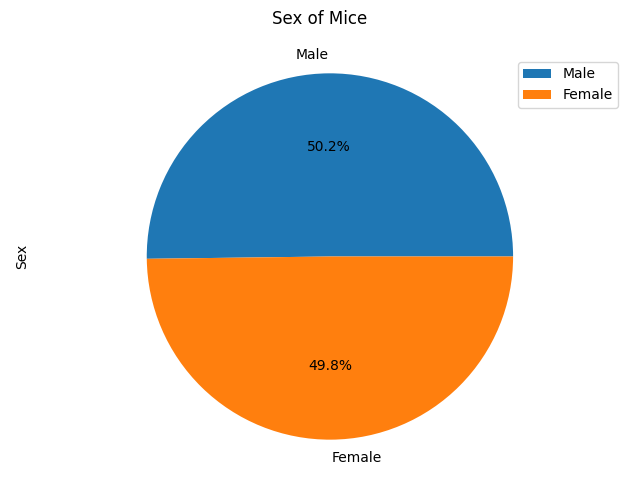

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# mice_sex = mice_groupby_df.plot(kind="pie", y=sex_list, title=("Sex of Mice " + mouse_id))
mice_sex = mouse_sex_df.plot(kind="pie", subplots=True, title=("Sex of Mice"), autopct = "%1.1f%%")

plt.show()
plt.axis("equal")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [20]:
# Find max timepoint for each mouse

max_tp_df = combined_df.groupby('Mouse ID')['Timepoint'].max()

max_tp_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [21]:
# Merge max timepoint onto data_df
merged_df = pd.merge(combined_df, max_tp_df, on=['Mouse ID', 'Timepoint'])
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [22]:
# Calculate the final tumor volume of each mouse across the treatment regimen Capomulin
capomulin_vol = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_vol.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)

capomulin_last
capomulin_vol

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [23]:
# Calculate the final tumor volume of each mouse across the treatment regimen Ramicane
ramicane_vol = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane"]

# Start by getting the last (greatest) timepoint for each mouse
ramicane_last = ramicane_vol.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)

ramicane_last
ramicane_vol

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30
c758,45
d251,45
e662,45
g791,45


In [24]:
# Calculate the final tumor volume of each mouse across the treatment regimen Infubinol
infubinol_vol = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol"]

# Start by getting the last (greatest) timepoint for each mouse
infubinol_last = infubinol_vol.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)

infubinol_last
infubinol_vol

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45
c326,5
c895,30
e476,45
f345,45


In [25]:
# Calculate the final tumor volume of each mouse across the treatment regimen Ceftamin
ceftamin_vol = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last = ceftamin_vol.groupby("Mouse ID").max()["Timepoint"] 
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_last
ceftamin_vol 

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [26]:
capomulin_vol.columns = ["capomulin"]
ramicane_vol.columns = ["ramicane"]
ceftamin_vol.columns = ["ceftamin"]
infubinol_vol.columns = ["infubinol"]
dfs = [
    capomulin_vol,
    ramicane_vol,
    ceftamin_vol,
    infubinol_vol
]
all_drugs = pd.concat(dfs, axis=1)
display(all_drugs.head(50))
display(all_drugs.tail(50))


,capomulin,ramicane,ceftamin,infubinol
Mouse ID,,,,
b128,45.0,NaN,NaN,NaN
b742,45.0,NaN,NaN,NaN
f966,20.0,NaN,NaN,NaN
g288,45.0,NaN,NaN,NaN
g316,45.0,NaN,NaN,NaN
i557,45.0,NaN,NaN,NaN
i738,45.0,NaN,NaN,NaN
j119,45.0,NaN,NaN,NaN
j246,35.0,NaN,NaN,NaN


,capomulin,ramicane,ceftamin,infubinol
Mouse ID,,,,
a275,NaN,NaN,45.0,NaN
b447,NaN,NaN,0.0,NaN
b487,NaN,NaN,25.0,NaN
b759,NaN,NaN,30.0,NaN
f436,NaN,NaN,15.0,NaN
h531,NaN,NaN,5.0,NaN
j296,NaN,NaN,45.0,NaN
k210,NaN,NaN,45.0,NaN
l471,NaN,NaN,45.0,NaN


In [27]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grp1_drugs = pd.merge(capomulin_vol,ramicane_vol, on = "Mouse ID", how = "outer",suffixes=('_capomulin', '_ramicane'))
tumor_vol_last_timepoint1 =  pd.merge(clean_df, grp1_drugs, on = "Mouse ID", how = "outer",suffixes=('_clean_df', '_grp1'))
grp2_drugs = pd.merge(ceftamin_vol,infubinol_vol, on = "Mouse ID", how = "outer",suffixes=('_ceftamin', '_infubinol'))
tumor_vol_last_timepoint =  pd.merge(tumor_vol_last_timepoint1, grp2_drugs, on = "Mouse ID", how = "outer",suffixes=('_clean', '_grp2'))
# drug_combined = pd.merge(grp1_drugs, grp2_drugs, on ="Mouse ID", how = "outer", suffixes=('_capomulin', '_ramicane','_ceftamin', '_infubinol'))
drug_combined = pd.merge(grp1_drugs,grp2_drugs, on ="Mouse ID", how = "outer", suffixes=('_capomulin', '_ramicane','_ceftamin', '_infubinol'))
                                                                                    
display (tumor_vol_last_timepoint)
display (drug_combined)                                                                                   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,capomulin,ramicane,ceftamin,infubinol
0,k403,Ramicane,Male,21,16,0,45.0,0,NaN,45.0,NaN,NaN
1,s185,Capomulin,Female,3,17,0,45.0,0,45.0,NaN,NaN,NaN
2,x401,Capomulin,Female,16,15,0,45.0,0,45.0,NaN,NaN,NaN
3,m601,Capomulin,Male,22,17,0,45.0,0,45.0,NaN,NaN,NaN
4,g791,Ramicane,Male,11,16,0,45.0,0,NaN,45.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0,NaN,NaN,NaN,NaN
245,z435,Propriva,Female,12,26,0,45.0,0,NaN,NaN,NaN,NaN
246,z581,Infubinol,Female,24,25,0,45.0,0,NaN,NaN,NaN,45.0
247,z795,Naftisol,Female,13,29,0,45.0,0,NaN,NaN,NaN,NaN


,capomulin,ramicane,ceftamin,infubinol
Mouse ID,,,,
b128,45.0,NaN,NaN,NaN
b742,45.0,NaN,NaN,NaN
f966,20.0,NaN,NaN,NaN
g288,45.0,NaN,NaN,NaN
g316,45.0,NaN,NaN,NaN
...,...,...,...,...
v766,NaN,NaN,NaN,15.0
w193,NaN,NaN,NaN,20.0
w584,NaN,NaN,NaN,30.0


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane","Ceftamin", "Infubinol"]
treatment_list

['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']

In [29]:
temp_df = merged_df.loc[merged_df['Drug Regimen'] == "Ramicane",'Tumor Volume (mm3)']
print(temp_df)

0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64


In [30]:
treatment_list

['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']

In [31]:
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [32]:
for drug in treatment_list:
    print(drug)

Capomulin
Ramicane
Ceftamin
Infubinol


In [33]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# drug_combined = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
   # Create a series that consists of all final volume values for each regimen
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    tumor_vol_list.append(temp_df)
    
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = temp_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')   
    print('+='*50)
    
# add subset 
# pandas.df.loc[]     
    
# Determine outliers using upper and lower bounds

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=


<IPython.core.display.Javascript object>


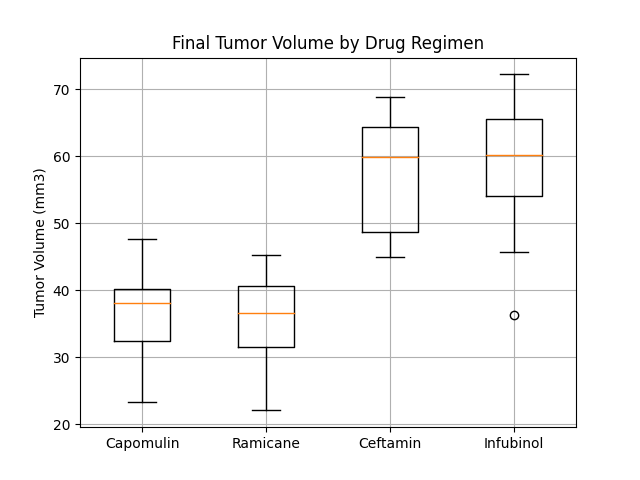

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_list)

ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_xticklabels(treatment_list)
ax1.set_ylabel("Tumor Volume (mm3)")


plt.grid()
plt.show()

## Line and Scatter Plots

In [55]:
%matplotlib notebook

<IPython.core.display.Javascript object>


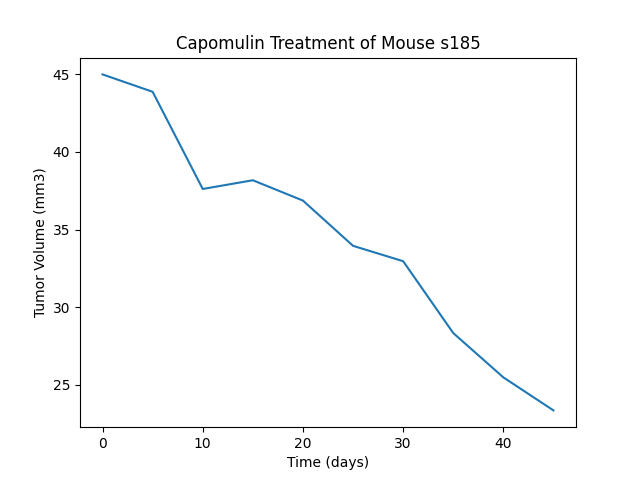

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = combined_df.loc[combined_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

In [57]:
%matplotlib notebook

<IPython.core.display.Javascript object>


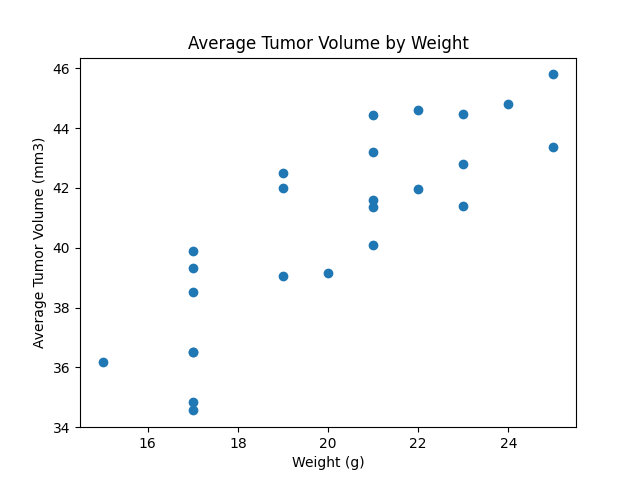

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Only show Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [61]:
%matplotlib notebook

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


<IPython.core.display.Javascript object>


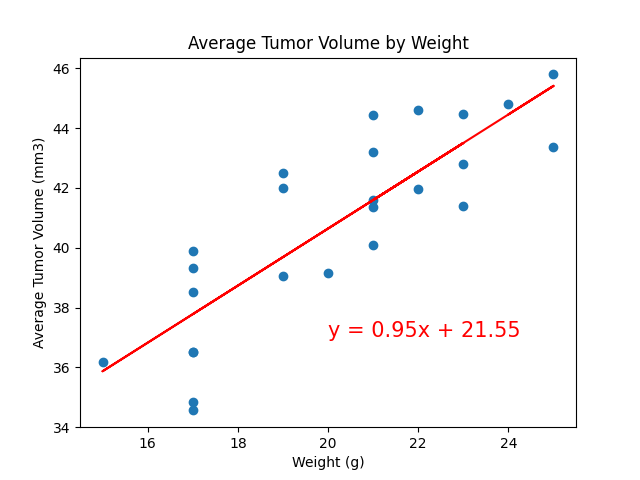

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Duplicate code for scatter plot from above:

from scipy.stats import linregress

capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()